<a href="https://colab.research.google.com/github/Sravani706/Assignment-4/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 1 [[ 2 -3  8]
 [ 4 -6  9]]
No solution


(-20.75, 45.25, -64.5, 34.5)

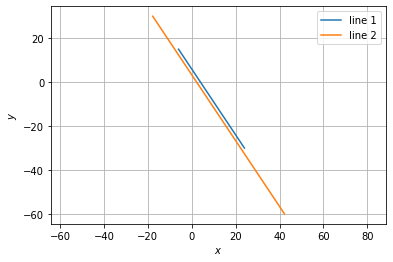

In [1]:
# -*- coding: utf-8 -*-
"""Verification and Fig Ass4.ipynb
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/1_p3qcOSWfS6vcqzBmn8vpYF08Oj8rmu_
"""

import numpy as np


def dir_vec(A,B):
  return B-A

def norm_vec(A,B):
  return np.matmul(omat, dir_vec(A,B))

#Generate line points
#def line_gen(A,B):
#  len =10
#  dim = A.shape[0]
#  x_AB = np.zeros((dim,len))
#  lam_1 = np.linspace(0,1,len)
#  for i in range(len):
#    temp1 = A + lam_1[i]*(B-A)
#    x_AB[:,i]= temp1.T
#  return x_AB

#Generate line intercepts
def line_icepts(n,c):
  e1 = np.array([1,0]) 
  e2 = np.array([0,1]) 
  A = c*e1/(n@e1)
  B = c*e2/(n@e2)
  return A,B

#Generate line points
def line_dir_pt(m,A,k1,k2):
  len =10
  dim = A.shape[0]
  x_AB = np.zeros((dim,len))
  lam_1 = np.linspace(k1,k2,len)
  for i in range(len):
    temp1 = A + lam_1[i]*m
    x_AB[:,i]= temp1.T
  return x_AB
#Generate line points

def line_norm_eq(n,c,k):
  len =10
  dim = n.shape[0]
  m = omat@n
  m = m/np.linalg.norm(m)
#  x_AB = np.zeros((dim,2*len))
  x_AB = np.zeros((dim,len))
  lam_1 = np.linspace(k[0],k[1],len)
#  print(lam_1)
#  lam_2 = np.linspace(0,k2,len)
  if c==0:
    for i in range(len):
      temp1 = lam_1[i]*m
      x_AB[:,i]= temp1.T
  else:
    A,B = line_icepts(n,c)
    for i in range(len):
      temp1 = A + lam_1[i]*m
      x_AB[:,i]= temp1.T
#    temp2 = B + lam_2[i]*m
#    x_AB[:,i+len]= temp2.T
  return x_AB

#def line_dir_pt(m,A, dim):
#  len = 10
#  dim = A.shape[0]
#  x_AB = np.zeros((dim,len))
#  lam_1 = np.linspace(0,10,len)
#  for i in range(len):
#    temp1 = A + lam_1[i]*m
#    x_AB[:,i]= temp1.T
#  return x_AB


#Generate line points
def line_gen(A,B):
  len =10
  x_AB = np.zeros((2,len))
  lam_1 = np.linspace(0,1,len)
  for i in range(len):
    temp1 = A + lam_1[i]*(B-A)
    x_AB[:,i]= temp1.T
  return x_AB

#Foot of the Altitude
def alt_foot(A,B,C):
  m = B-C
  n = np.matmul(omat,m) 
  N=np.vstack((m,n))
  p = np.zeros(2)
  p[0] = m@A 
  p[1] = n@B
  #Intersection
  P=np.linalg.inv(N.T)@p
  return P

#Intersection of two lines
def line_intersect(n1,c1,n2,c2):
  N=np.vstack((n1,n2))
  p = np.array([c1,c2]) 
  #Intersection
  P=np.linalg.inv(N)@p
#  P=np.linalg.inv(N.T)@p
  return P

#Radius and centre of the circumcircle
#of triangle ABC
def ccircle(A,B,C):
  p = np.zeros(2)
  n1 = dir_vec(B,A)
  p[0] = 0.5*(np.linalg.norm(A)**2-np.linalg.norm(B)**2)
  n2 = dir_vec(C,B)
  p[1] = 0.5*(np.linalg.norm(B)**2-np.linalg.norm(C)**2)
  #Intersection
  N=np.vstack((n1,n2))
  O=np.linalg.inv(N)@p
  r = np.linalg.norm(A -O)
  return O,r

#Radius and centre of the incircle
#of triangle ABC
def icentre(A,B,C,k1,k2):
  p = np.zeros(2)
  t = norm_vec(B,C)
  n1 = t/np.linalg.norm(t)
  t = norm_vec(C,A)
  n2 = t/np.linalg.norm(t)
  t = norm_vec(A,B)
  n3 = t/np.linalg.norm(t)
  p[0] = n1@B- k1*n2@C
  p[1] = n2@C- k2*n3@A
  N=np.vstack((n1-k1*n2,n2-k2*n3))
  I=np.matmul(np.linalg.inv(N),p)
  r = n1@(I-B)
  #Intersection
  return I,r

def mult_line(A_I,b_z,k,m):
 for i in range(m):
  if i == 0:
    x = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
  elif i == 1:
    y = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
    z = np.vstack((x[None], y[None]))
  else:
    x = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
    z = np.vstack((z,x[None]))
 return z

dvec = np.array([-1,1]) 
#Orthogonal matrix
omat = np.array([[0,1],[-1,0]]) 
#Code by sravani sandya 
#JUNE, 4 2021
#Check whether a system of linear equations has a solution

import numpy as np
import matplotlib.pyplot as plt


#if using termux
import subprocess
import shlex
#end if



#Lines
n1 = np.array([2,-3]) 
n2 = np.array([4,-6]) 
c =  np.array([8,9]) 

#Intercepts
A1,B1 =  line_icepts(n1,c[0])
A2,B2 =  line_icepts(n2,c[1])


#Matrix Ranks
N=np.vstack((n1,n2))
M =np.vstack((N.T, c)).T
#M =np.vstack((n1,n2, c))
rank_N = np.linalg.matrix_rank(N)
rank_M = np.linalg.matrix_rank(M)
m,n = np.shape(N)
print(rank_M, rank_N, M)

#Checking for solution
if rank_N==rank_M:
	if rank_N == m:
		print("Unique Solution Exists:",np.linalg.inv(N)@c)
	else:
		print("Infinite Number of Solutions")
else:
	print("No solution")

##Generating all lines
k1 = -5
k2 = 10


x_A1B1 =  line_dir_pt(n1,A1,k1,k2)
#k1 = -10
#K2 = 20
x_A2B2 =   line_dir_pt(n2,A2,k1,k2)
#
#Plotting all lines
plt.plot(x_A1B1[0,:],x_A1B1[1,:],label='line 1')
plt.plot(x_A2B2[0,:],x_A2B2[1,:],label='line 2')
#
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')

#else
#plt.show()